## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, zscore

## Set file paths for train and predict datasets

In [2]:
train_dataset = "Dataset/Train.csv"
predict_dataset = "Dataset/Test.csv"

## Set file paths for EDA diagrams

In [3]:
corr_heatmap = "EDA Diagrams/Correlation Heatmap/"
area = "EDA Diagrams/Data Distribution/Area/"
luminosity = "EDA Diagrams/Data Distribution/Max Luminosity/"
thickness = "EDA Diagrams/Data Distribution/Thickness/"
x_values = "EDA Diagrams/Data Distribution/X-values/"
y_values = "EDA Diagrams/Data Distribution/Y-values/"

## Get train and predict dataset info

In [71]:
train_df = pd.read_csv(train_dataset)
train_df.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2


In [16]:
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grade_A_Component_1  1358 non-null   int64  
 1   grade_A_Component_2  1358 non-null   int64  
 2   max_luminosity       1358 non-null   int64  
 3   thickness            1358 non-null   int64  
 4   xmin                 1358 non-null   int64  
 5   xmax                 1358 non-null   int64  
 6   ymin                 1358 non-null   int64  
 7   ymax                 1358 non-null   int64  
 8   pixel_area           1358 non-null   int64  
 9   log_area             1358 non-null   float64
 10  x_component_1        1358 non-null   int64  
 11  x_component_2        1358 non-null   int64  
 12  x_component_3        1358 non-null   int64  
 13  x_component_4        1358 non-null   int64  
 14  x_component_5        1358 non-null   int64  
 15  class                1358 non-null   i

In [17]:
predict_df = pd.read_csv(predict_dataset)
predict_df.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
0,1,0,123,65,33,54,1646439,1646893,632,632.391749,0,1,0,0,0
1,0,1,158,99,125,132,189874,189529,421,421.928609,0,0,0,0,0
2,0,1,120,35,64,75,12986873,12986862,272,272.212214,1,0,0,0,0
3,0,1,130,39,57,177,309634,310824,3312,3312.310581,0,0,1,0,0
4,1,0,142,75,23,79,5368307,5367467,862,862.499179,0,0,0,0,0


In [18]:
predict_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grade_A_Component_1  583 non-null    int64  
 1   grade_A_Component_2  583 non-null    int64  
 2   max_luminosity       583 non-null    int64  
 3   thickness            583 non-null    int64  
 4   xmin                 583 non-null    int64  
 5   xmax                 583 non-null    int64  
 6   ymin                 583 non-null    int64  
 7   ymax                 583 non-null    int64  
 8   pixel_area           583 non-null    int64  
 9   log_area             583 non-null    float64
 10  x_component_1        583 non-null    int64  
 11  x_component_2        583 non-null    int64  
 12  x_component_3        583 non-null    int64  
 13  x_component_4        583 non-null    int64  
 14  x_component_5        583 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 6

## Examine correlation of raw data

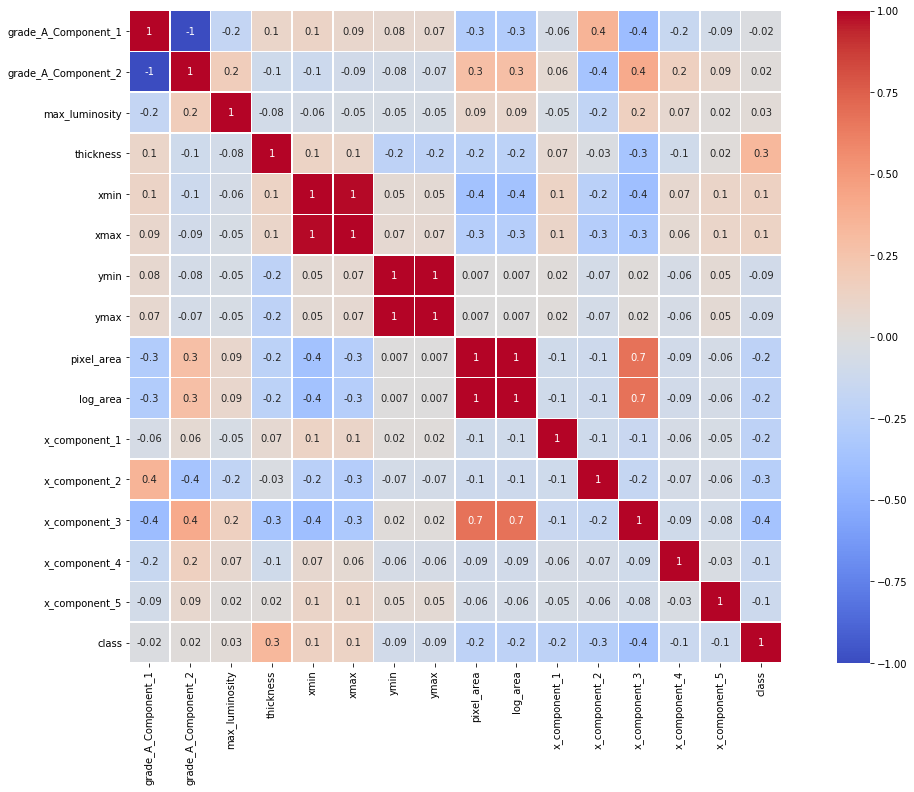

In [19]:
plt.figure(figsize=(20,12))
ax = sns.heatmap(train_df.corr(), annot=True, linewidth = 0.5, cmap='coolwarm', 
                 fmt='.1g', vmin=-1, vmax=1, center= 0, square=True)
plt.savefig(corr_heatmap + 'heatmap_rawdata.png', dpi=300, bbox_inches='tight')

## Examine data distribution

#### max_luminosity

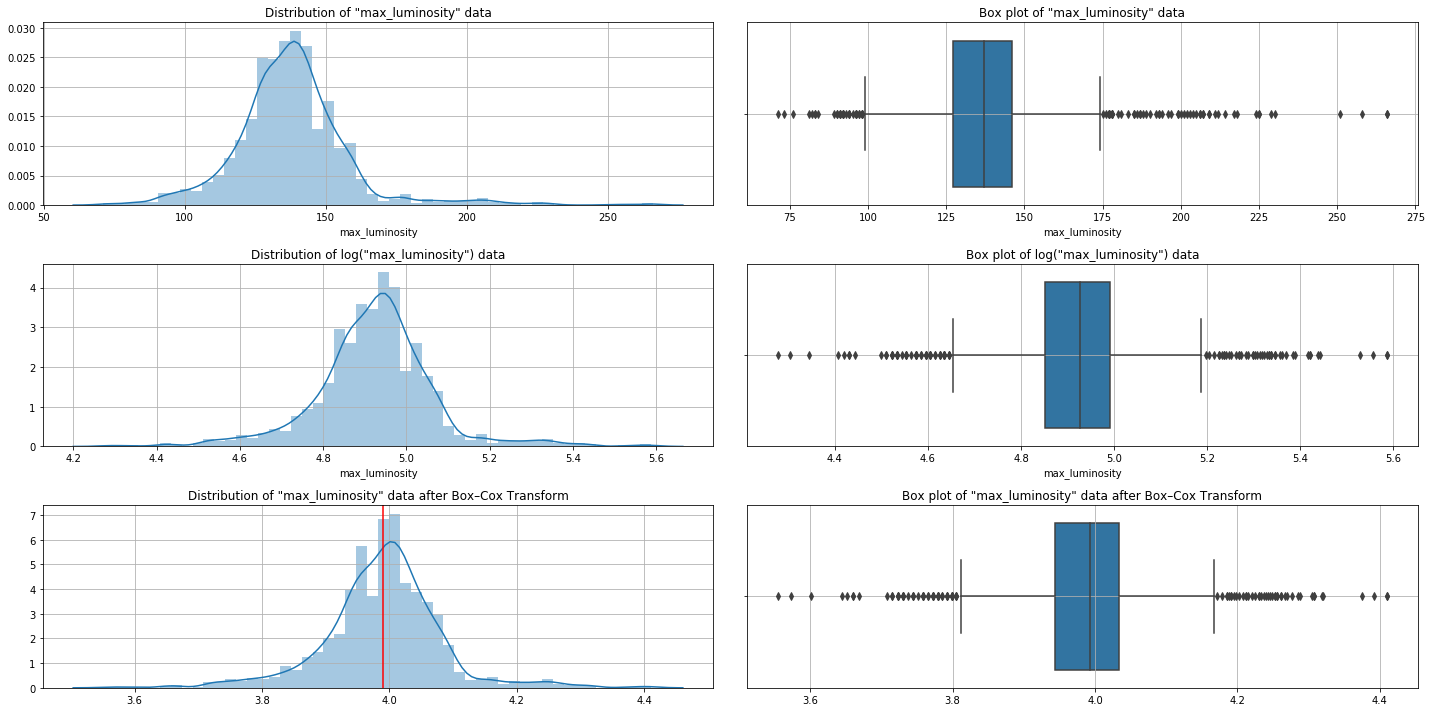

In [9]:
x1 = train_df['max_luminosity']
x2 = np.log1p(x1)
_, opt_lambda = boxcox(x1)
x3 = boxcox(x1, lmbda=opt_lambda)
x3_mean = np.round(np.mean(x3),2)

fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(3, 2, 1); plt.tight_layout();
sns.distplot(x1).set_title('Distribution of "max_luminosity" data')
plt.grid()
plt.subplot(3, 2, 2); plt.tight_layout();
sns.boxplot(x1).set_title('Box plot of "max_luminosity" data')
plt.grid()
plt.subplot(3, 2, 3); plt.tight_layout();
sns.distplot(x2).set_title('Distribution of log("max_luminosity") data')
plt.grid()
plt.subplot(3, 2, 4); plt.tight_layout();
sns.boxplot(x2).set_title('Box plot of log("max_luminosity") data')
plt.grid()
plt.subplot(3, 2, 5); plt.tight_layout();
sns.distplot(x3).set_title('Distribution of "max_luminosity" data after Box–Cox Transform')
plt.axvline(x3_mean, color='r')
plt.grid()
plt.subplot(3, 2, 6); plt.tight_layout();
sns.boxplot(x3).set_title('Box plot of "max_luminosity" data after Box–Cox Transform')
plt.grid()
plt.savefig(luminosity + 'data_distribution_max_luminosity.png', dpi=300, bbox_inches='tight')

#### thickness

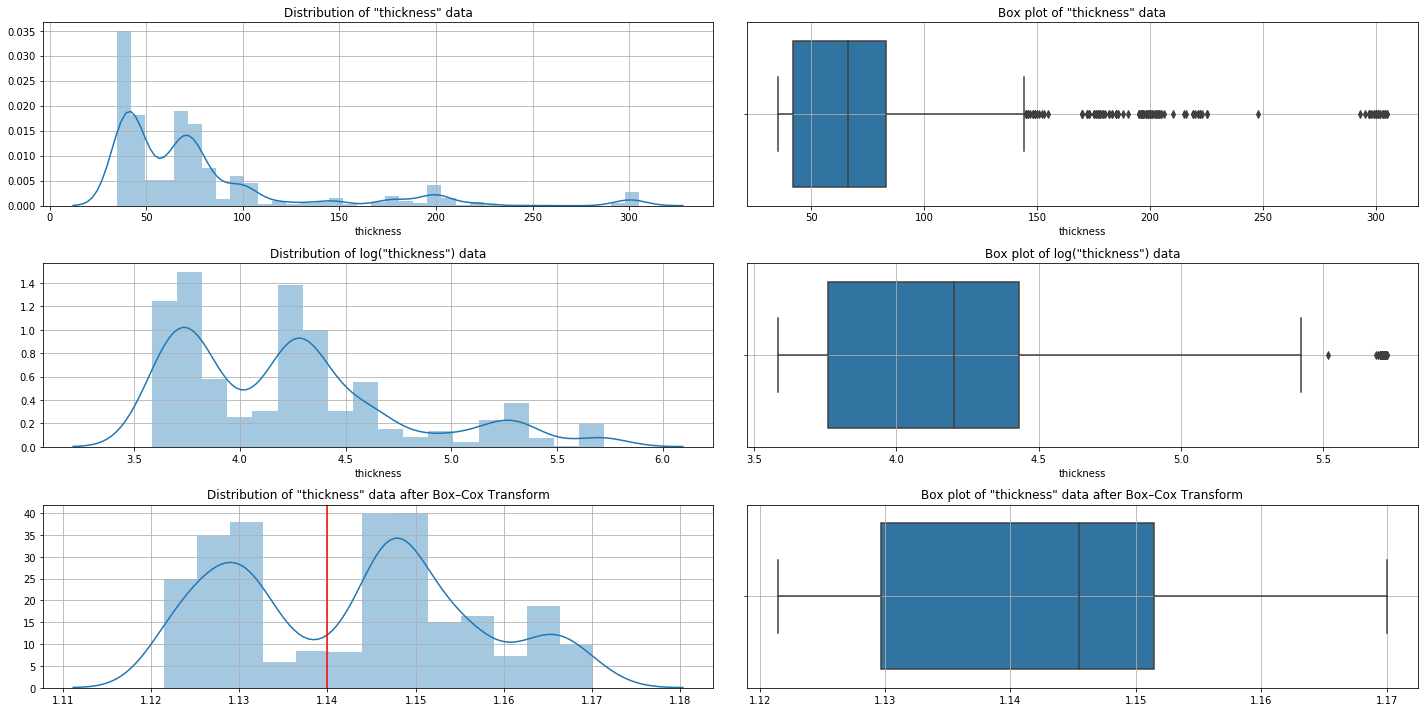

In [10]:
x1 = train_df['thickness']
x2 = np.log1p(x1)
_, opt_lambda = boxcox(x1)
x3 = boxcox(x1, lmbda=opt_lambda)
x3_mean = np.round(np.mean(x3),2)

fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(3, 2, 1); plt.tight_layout();
sns.distplot(x1).set_title('Distribution of "thickness" data')
plt.grid()
plt.subplot(3, 2, 2); plt.tight_layout();
sns.boxplot(x1).set_title('Box plot of "thickness" data')
plt.grid()
plt.subplot(3, 2, 3); plt.tight_layout();
sns.distplot(x2).set_title('Distribution of log("thickness") data')
plt.grid()
plt.subplot(3, 2, 4); plt.tight_layout();
sns.boxplot(x2).set_title('Box plot of log("thickness") data')
plt.grid()
plt.subplot(3, 2, 5); plt.tight_layout();
sns.distplot(x3).set_title('Distribution of "thickness" data after Box–Cox Transform')
plt.axvline(x3_mean, color='r')
plt.grid()
plt.subplot(3, 2, 6); plt.tight_layout();
sns.boxplot(x3).set_title('Box plot of "thickness" data after Box–Cox Transform')
plt.grid()
plt.savefig(thickness + 'data_distribution_thickness.png', dpi=300, bbox_inches='tight')

#### xmin / xmax

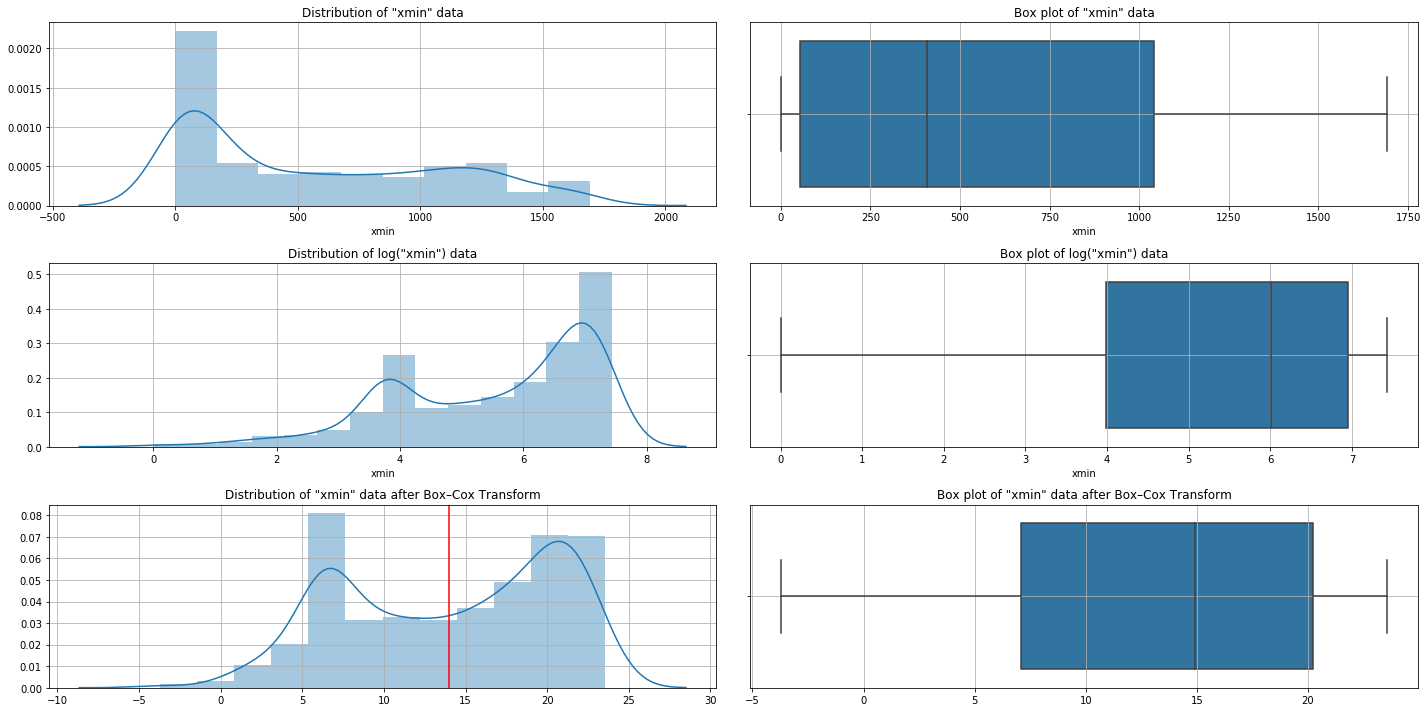

In [11]:
x1 = train_df['xmin']
x2 = np.log1p(x1)
_, opt_lambda = boxcox(x1 + 1e-10)
x3 = boxcox(x1 + 1e-10, lmbda=opt_lambda)
x3_mean = np.round(np.mean(x3),2)

fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(3, 2, 1); plt.tight_layout();
sns.distplot(x1).set_title('Distribution of "xmin" data')
plt.grid()
plt.subplot(3, 2, 2); plt.tight_layout();
sns.boxplot(x1).set_title('Box plot of "xmin" data')
plt.grid()
plt.subplot(3, 2, 3); plt.tight_layout();
sns.distplot(x2).set_title('Distribution of log("xmin") data')
plt.grid()
plt.subplot(3, 2, 4); plt.tight_layout();
sns.boxplot(x2).set_title('Box plot of log("xmin") data')
plt.grid()
plt.subplot(3, 2, 5); plt.tight_layout();
sns.distplot(x3).set_title('Distribution of "xmin" data after Box–Cox Transform')
plt.axvline(x3_mean, color='r')
plt.grid()
plt.subplot(3, 2, 6); plt.tight_layout();
sns.boxplot(x3).set_title('Box plot of "xmin" data after Box–Cox Transform')
plt.grid()
plt.savefig(x_values + 'data_distribution_xmin.png', dpi=300, bbox_inches='tight')

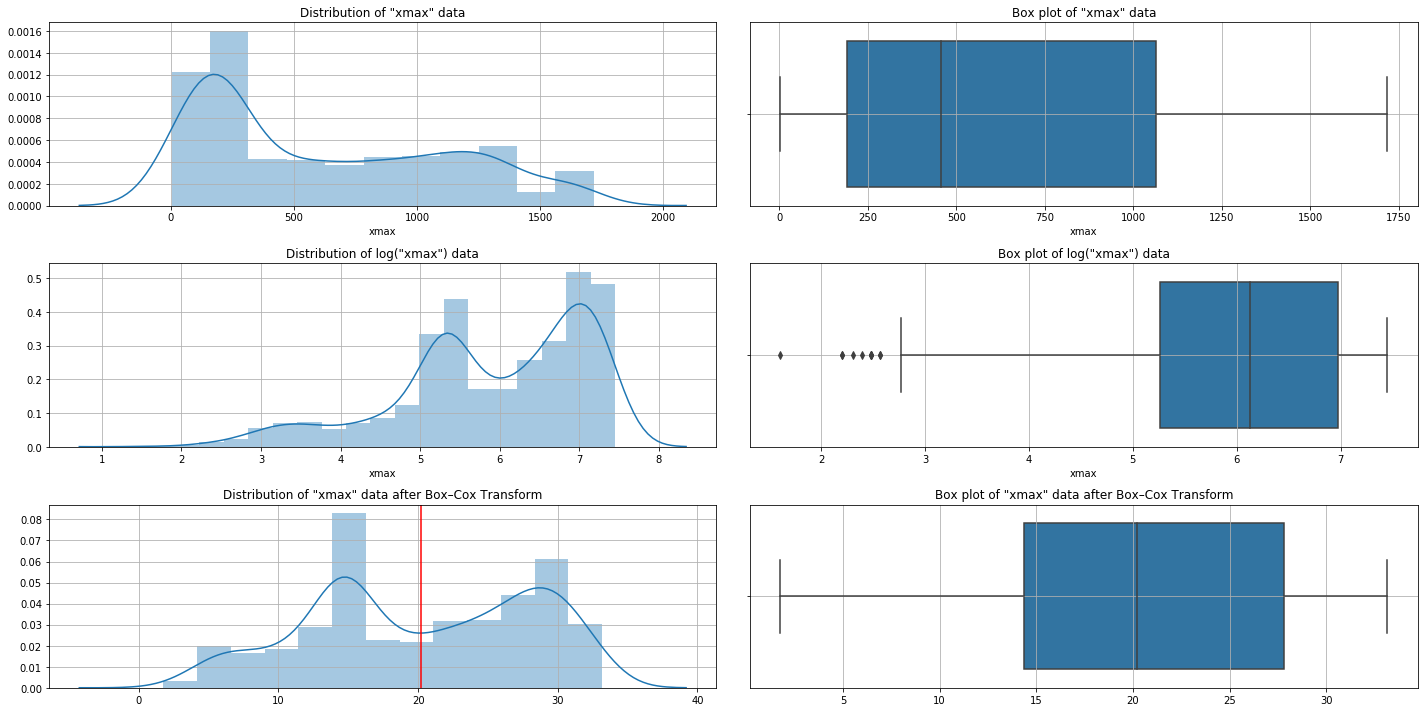

In [12]:
x1 = train_df['xmax']
x2 = np.log1p(x1)
_, opt_lambda = boxcox(x1)
x3 = boxcox(x1, lmbda=opt_lambda)
x3_mean = np.round(np.mean(x3),2)

fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(3, 2, 1); plt.tight_layout();
sns.distplot(x1).set_title('Distribution of "xmax" data')
plt.grid()
plt.subplot(3, 2, 2); plt.tight_layout();
sns.boxplot(x1).set_title('Box plot of "xmax" data')
plt.grid()
plt.subplot(3, 2, 3); plt.tight_layout();
sns.distplot(x2).set_title('Distribution of log("xmax") data')
plt.grid()
plt.subplot(3, 2, 4); plt.tight_layout();
sns.boxplot(x2).set_title('Box plot of log("xmax") data')
plt.grid()
plt.subplot(3, 2, 5); plt.tight_layout();
sns.distplot(x3).set_title('Distribution of "xmax" data after Box–Cox Transform')
plt.axvline(x3_mean, color='r')
plt.grid()
plt.subplot(3, 2, 6); plt.tight_layout();
sns.boxplot(x3).set_title('Box plot of "xmax" data after Box–Cox Transform')
plt.grid()
plt.savefig(x_values + 'data_distribution_xmax.png', dpi=300, bbox_inches='tight')

#### ymin / ymax

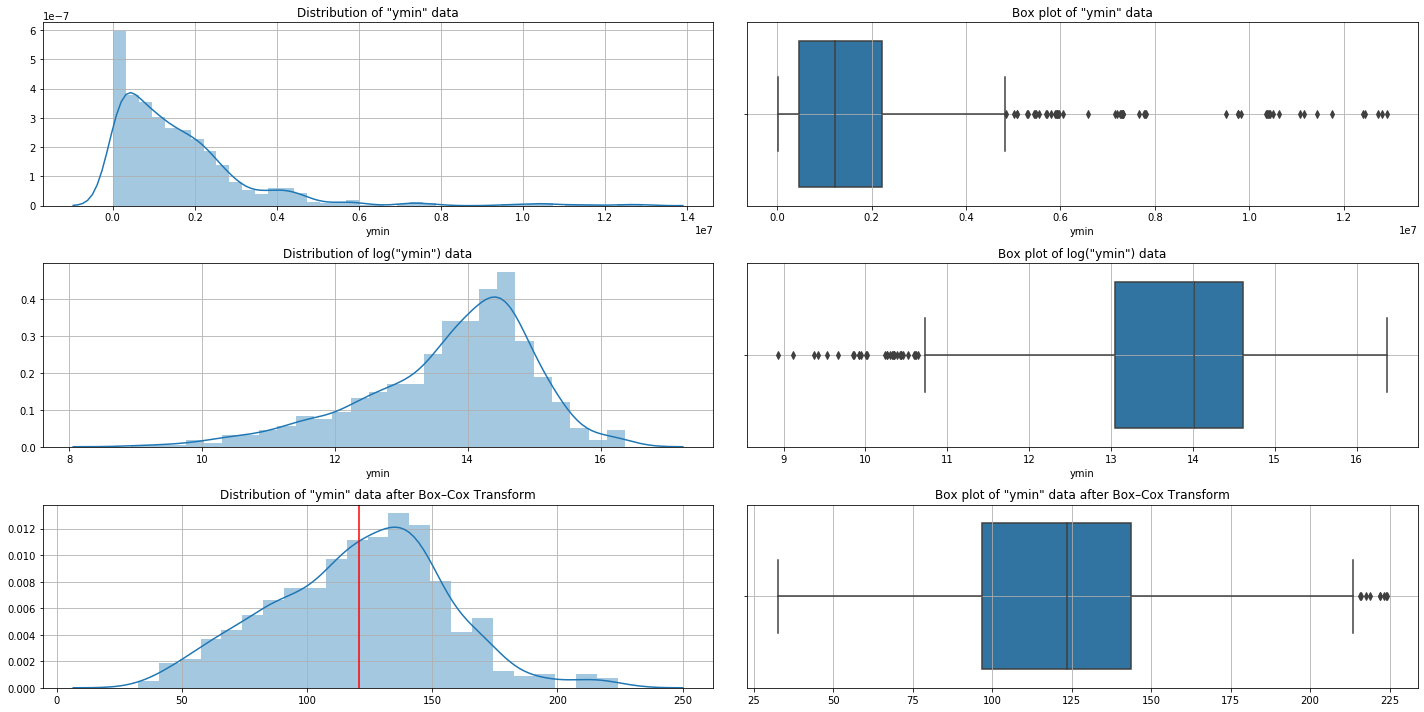

In [13]:
x1 = train_df['ymin']
x2 = np.log1p(x1)
_, opt_lambda = boxcox(x1 + 1e-10)
x3 = boxcox(x1 + 1e-10, lmbda=opt_lambda)
x3_mean = np.round(np.mean(x3),2)

fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(3, 2, 1); plt.tight_layout();
sns.distplot(x1).set_title('Distribution of "ymin" data')
plt.grid()
plt.subplot(3, 2, 2); plt.tight_layout();
sns.boxplot(x1).set_title('Box plot of "ymin" data')
plt.grid()
plt.subplot(3, 2, 3); plt.tight_layout();
sns.distplot(x2).set_title('Distribution of log("ymin") data')
plt.grid()
plt.subplot(3, 2, 4); plt.tight_layout();
sns.boxplot(x2).set_title('Box plot of log("ymin") data')
plt.grid()
plt.subplot(3, 2, 5); plt.tight_layout();
sns.distplot(x3).set_title('Distribution of "ymin" data after Box–Cox Transform')
plt.axvline(x3_mean, color='r')
plt.grid()
plt.subplot(3, 2, 6); plt.tight_layout();
sns.boxplot(x3).set_title('Box plot of "ymin" data after Box–Cox Transform')
plt.grid()
plt.savefig(y_values + 'data_distribution_ymin.png', dpi=300, bbox_inches='tight')

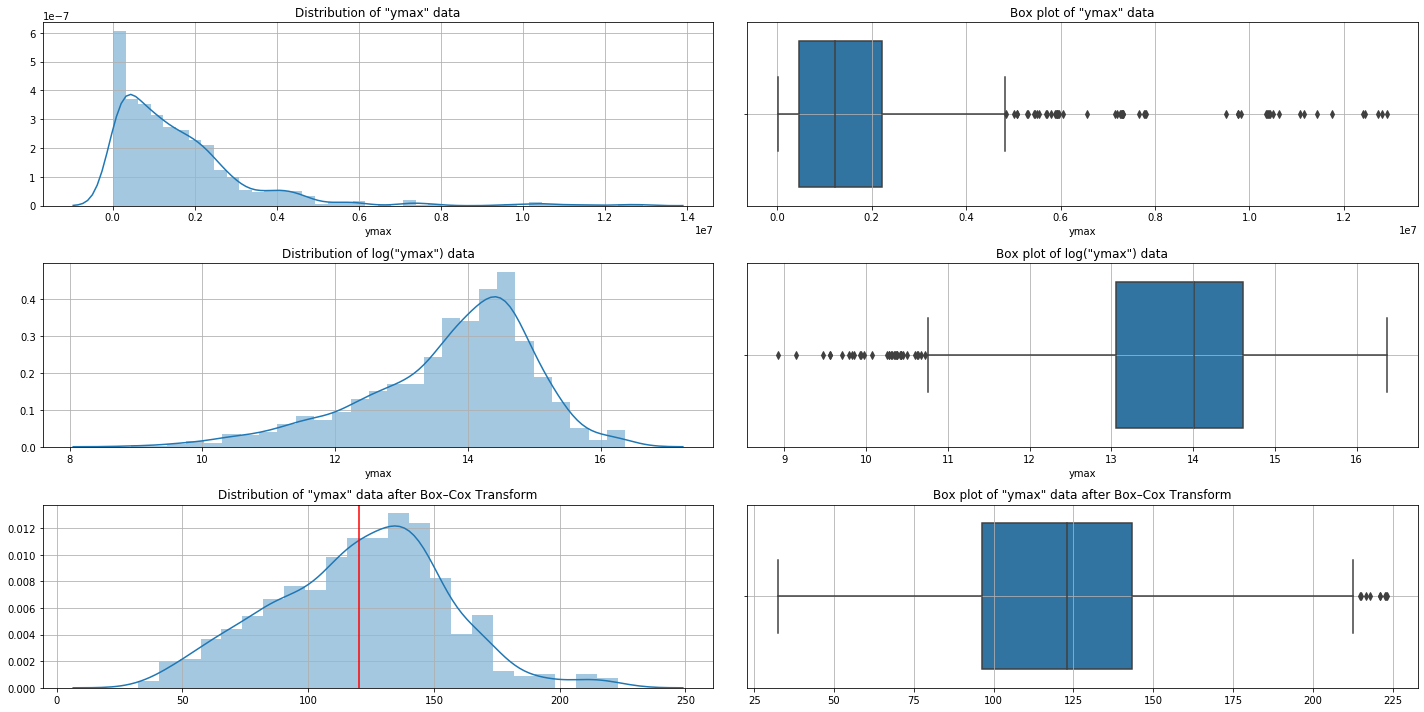

In [14]:
x1 = train_df['ymax']
x2 = np.log1p(x1)
_, opt_lambda = boxcox(x1)
x3 = boxcox(x1, lmbda=opt_lambda)
x3_mean = np.round(np.mean(x3),2)

fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(3, 2, 1); plt.tight_layout();
sns.distplot(x1).set_title('Distribution of "ymax" data')
plt.grid()
plt.subplot(3, 2, 2); plt.tight_layout();
sns.boxplot(x1).set_title('Box plot of "ymax" data')
plt.grid()
plt.subplot(3, 2, 3); plt.tight_layout();
sns.distplot(x2).set_title('Distribution of log("ymax") data')
plt.grid()
plt.subplot(3, 2, 4); plt.tight_layout();
sns.boxplot(x2).set_title('Box plot of log("ymax") data')
plt.grid()
plt.subplot(3, 2, 5); plt.tight_layout();
sns.distplot(x3).set_title('Distribution of "ymax" data after Box–Cox Transform')
plt.axvline(x3_mean, color='r')
plt.grid()
plt.subplot(3, 2, 6); plt.tight_layout();
sns.boxplot(x3).set_title('Box plot of "ymax" data after Box–Cox Transform')
plt.grid()
plt.savefig(y_values + 'data_distribution_ymax.png', dpi=300, bbox_inches='tight')

#### pixel_area

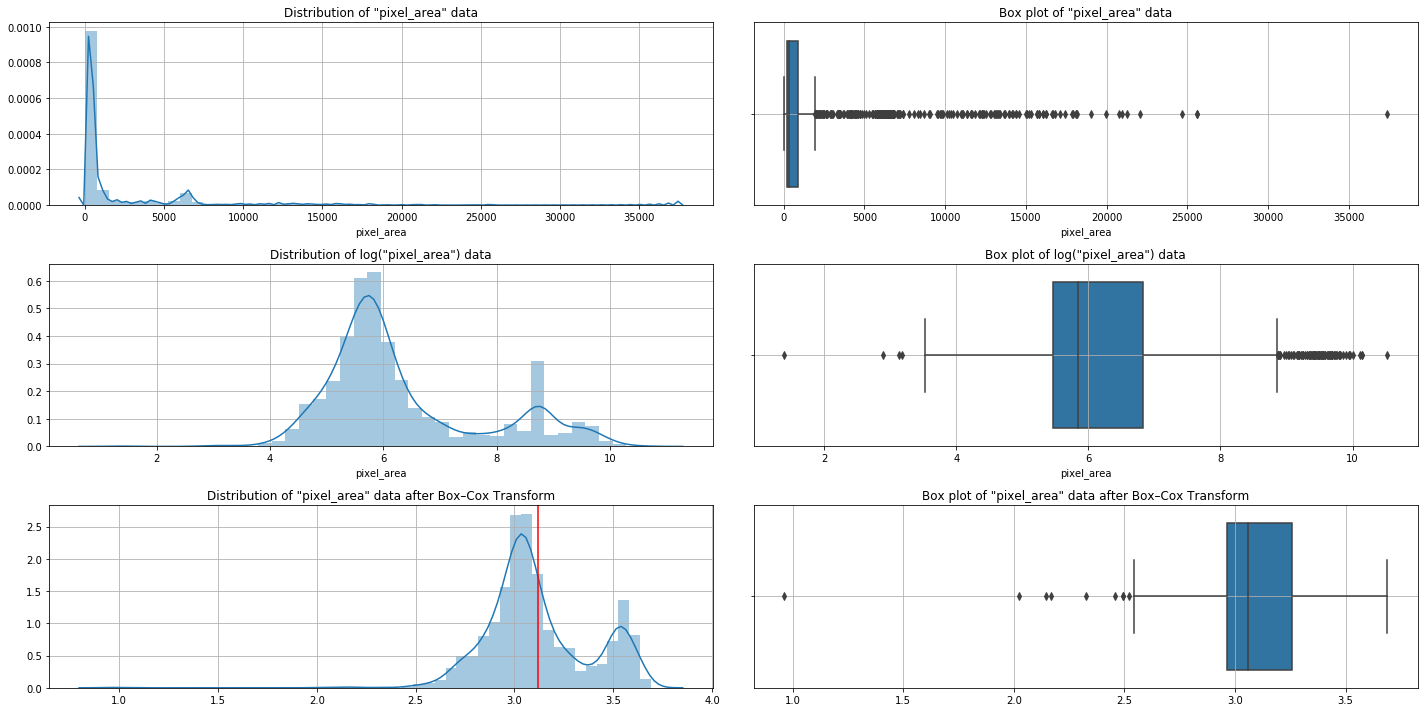

In [15]:
x1 = train_df['pixel_area']
x2 = np.log1p(x1)
_, opt_lambda = boxcox(x1)
x3 = boxcox(x1, lmbda=opt_lambda)
x3_mean = np.round(np.mean(x3),2)

fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(3, 2, 1); plt.tight_layout();
sns.distplot(x1).set_title('Distribution of "pixel_area" data')
plt.grid()
plt.subplot(3, 2, 2); plt.tight_layout();
sns.boxplot(x1).set_title('Box plot of "pixel_area" data')
plt.grid()
plt.subplot(3, 2, 3); plt.tight_layout();
sns.distplot(x2).set_title('Distribution of log("pixel_area") data')
plt.grid()
plt.subplot(3, 2, 4); plt.tight_layout();
sns.boxplot(x2).set_title('Box plot of log("pixel_area") data')
plt.grid()
plt.subplot(3, 2, 5); plt.tight_layout();
sns.distplot(x3).set_title('Distribution of "pixel_area" data after Box–Cox Transform')
plt.axvline(x3_mean, color='r')
plt.grid()
plt.subplot(3, 2, 6); plt.tight_layout();
sns.boxplot(x3).set_title('Box plot of "pixel_area" data after Box–Cox Transform')
plt.grid()
plt.savefig(area + 'data_distribution_pixel_area.png', dpi=300, bbox_inches='tight')

####  log_area

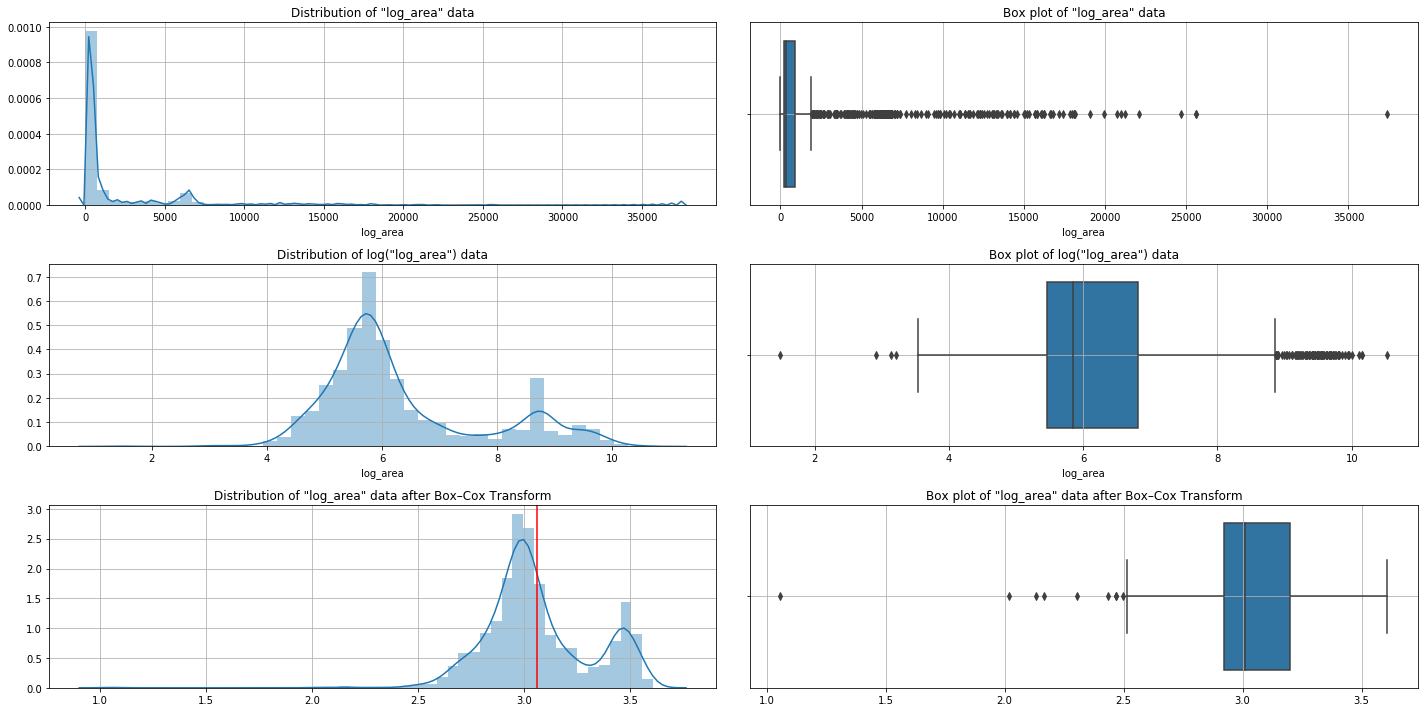

In [16]:
x1 = train_df['log_area']
x2 = np.log1p(x1)
_, opt_lambda = boxcox(x1)
x3 = boxcox(x1, lmbda=opt_lambda)
x3_mean = np.round(np.mean(x3),2)

fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(3, 2, 1); plt.tight_layout();
sns.distplot(x1).set_title('Distribution of "log_area" data')
plt.grid()
plt.subplot(3, 2, 2); plt.tight_layout();
sns.boxplot(x1).set_title('Box plot of "log_area" data')
plt.grid()
plt.subplot(3, 2, 3); plt.tight_layout();
sns.distplot(x2).set_title('Distribution of log("log_area") data')
plt.grid()
plt.subplot(3, 2, 4); plt.tight_layout();
sns.boxplot(x2).set_title('Box plot of log("log_area") data')
plt.grid()
plt.subplot(3, 2, 5); plt.tight_layout();
sns.distplot(x3).set_title('Distribution of "log_area" data after Box–Cox Transform')
plt.axvline(x3_mean, color='r')
plt.grid()
plt.subplot(3, 2, 6); plt.tight_layout();
sns.boxplot(x3).set_title('Box plot of "log_area" data after Box–Cox Transform')
plt.grid()
plt.savefig(area + 'data_distribution_log_area.png', dpi=300, bbox_inches='tight')

## Combine high-correlated features

In [4]:
train_df = pd.read_csv(train_dataset)

In [5]:
train_df['xval'] = (train_df['xmin'] + train_df['xmax'])/2
train_df['ydiff'] = np.abs(train_df['ymax'] - train_df['ymin'])
train_df['area_diff'] = np.abs(train_df['pixel_area'] - train_df['log_area'])

train_df.drop(['xmax','xmin','ymax','ymin','log_area','pixel_area'], axis = 1, inplace=True)

## Data distribution of combined features

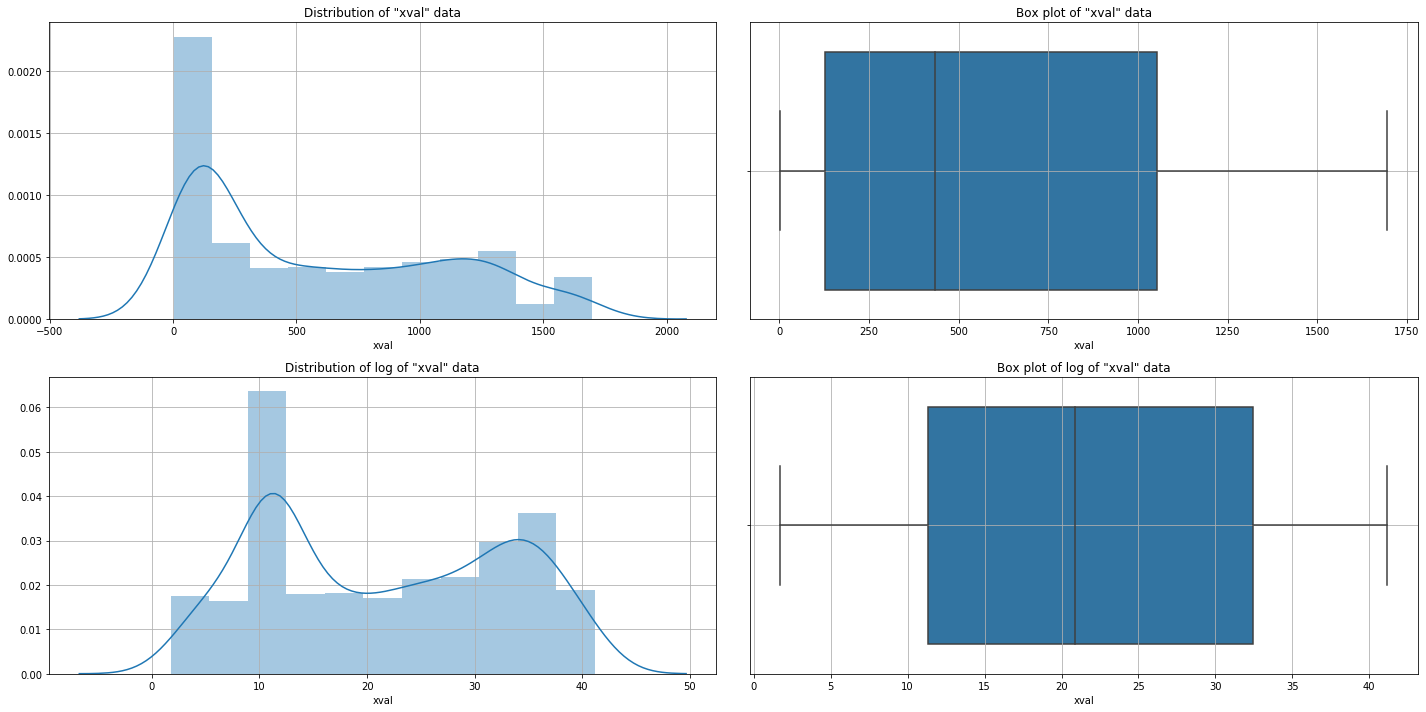

In [10]:
fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(2, 2, 1); plt.tight_layout();
sns.distplot(train_df['xval']).set_title('Distribution of "xval" data')
plt.grid()
plt.subplot(2, 2, 2); plt.tight_layout();
sns.boxplot(x=train_df['xval']).set_title('Box plot of "xval" data')
plt.grid()
plt.subplot(2, 2, 3); plt.tight_layout();
sns.distplot(np.sqrt(train_df['xval'])).set_title('Distribution of log of "xval" data')
plt.grid()
plt.subplot(2, 2, 4); plt.tight_layout();
sns.boxplot(np.sqrt(train_df['xval'])).set_title('Box plot of log of "xval" data')
plt.grid()
plt.savefig(x_values + 'data_distribution_xval.png', dpi=300, bbox_inches='tight')

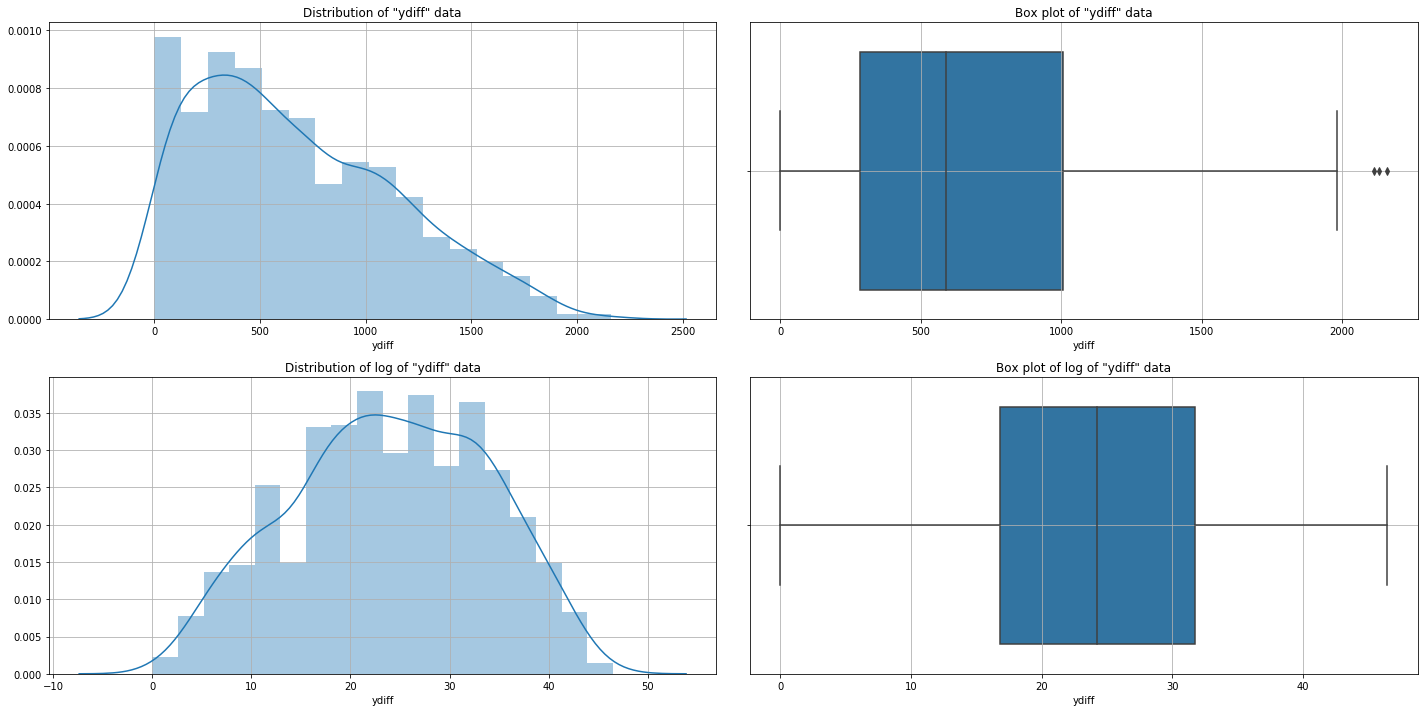

In [9]:
fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(2, 2, 1); plt.tight_layout();
sns.distplot(train_df['ydiff']).set_title('Distribution of "ydiff" data')
plt.grid()
plt.subplot(2, 2, 2); plt.tight_layout();
sns.boxplot(x=train_df['ydiff']).set_title('Box plot of "ydiff" data')
plt.grid()
plt.subplot(2, 2, 3); plt.tight_layout();
sns.distplot(np.sqrt(train_df['ydiff'])).set_title('Distribution of log of "ydiff" data')
plt.grid()
plt.subplot(2, 2, 4); plt.tight_layout();
sns.boxplot(np.sqrt(train_df['ydiff'])).set_title('Box plot of log of "ydiff" data')
plt.grid()
plt.savefig(y_values + 'data_distribution_yval.png', dpi=300, bbox_inches='tight')

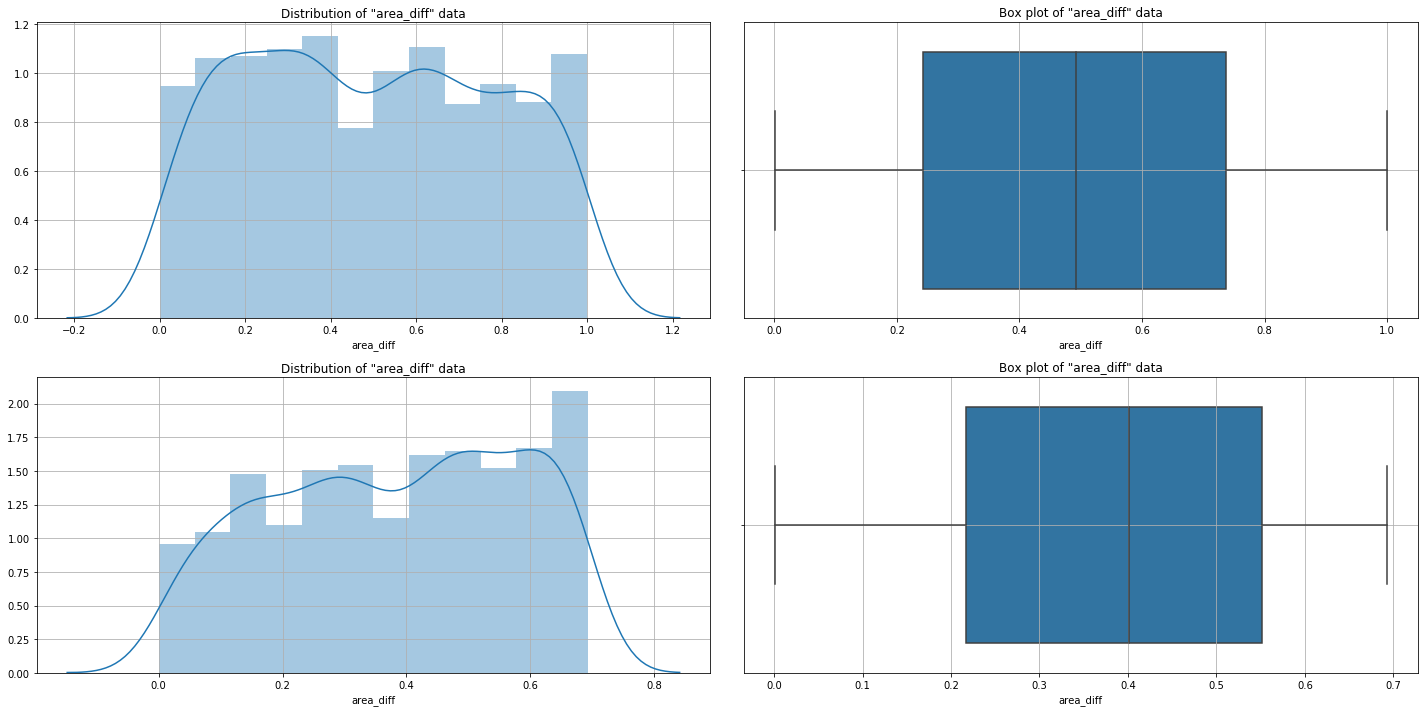

In [12]:
fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(2, 2, 1); plt.tight_layout();
sns.distplot(train_df['area_diff']).set_title('Distribution of "area_diff" data')
plt.grid()
plt.subplot(2, 2, 2); plt.tight_layout();
sns.boxplot(x=train_df['area_diff']).set_title('Box plot of "area_diff" data')
plt.grid()
plt.subplot(2, 2, 3); plt.tight_layout();
sns.distplot(np.log1p(train_df['area_diff'])).set_title('Distribution of "area_diff" data')
plt.grid()
plt.subplot(2, 2, 4); plt.tight_layout();
sns.boxplot(np.log1p(train_df['area_diff'])).set_title('Box plot of "area_diff" data')
plt.grid()
plt.savefig(area + 'data_distribution_area_val_diff.png', dpi=300, bbox_inches='tight')

## Examine correlation after combining features

In [100]:
train_df.drop(['xdiff','yval','area_val'], axis = 1, inplace=True)

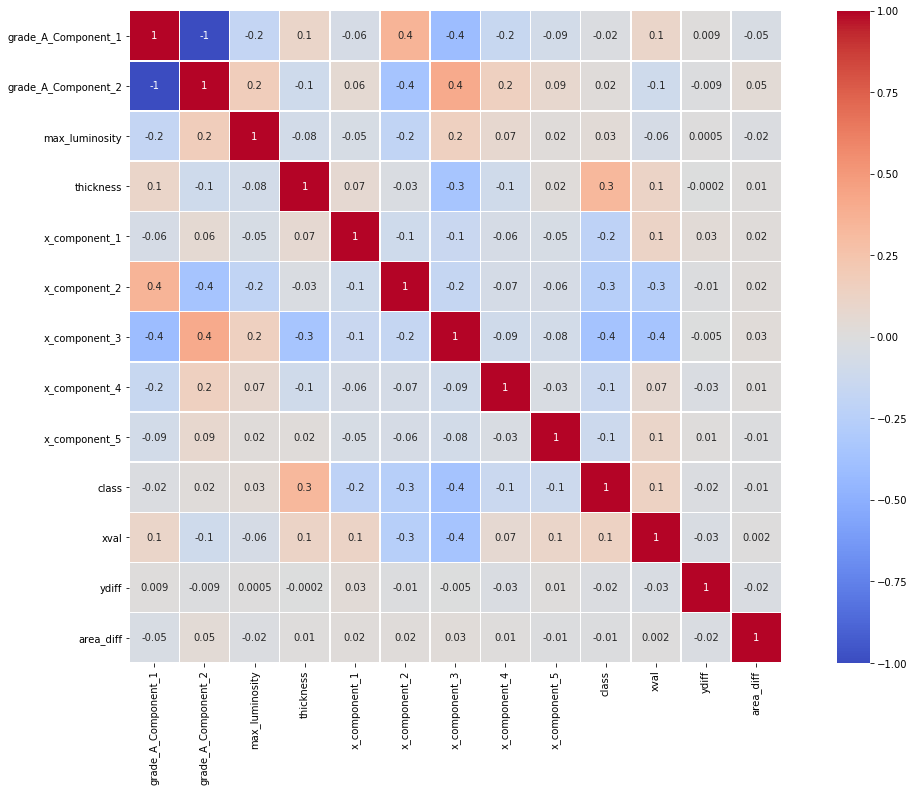

In [89]:
plt.figure(figsize=(20,12))
ax = sns.heatmap(train_df.corr(), annot=True, linewidth = 0.5, cmap='coolwarm', 
                 fmt='.1g', vmin=-1, vmax=1, center= 0, square=True)
plt.savefig(corr_heatmap + 'heatmap_combined_features.png', dpi=300, bbox_inches='tight')

## Box-cox transform data

In [101]:
_, opt_lambda = boxcox(train_df['max_luminosity'])
train_df['max_luminosity'] = boxcox(train_df['max_luminosity'], lmbda=opt_lambda)

_, opt_lambda = boxcox(train_df['thickness'])
train_df['thickness'] = boxcox(train_df['thickness'], lmbda=opt_lambda)

_, opt_lambda = boxcox(train_df['xval'])
train_df['xval'] = boxcox(train_df['xval'], lmbda=opt_lambda)

_, opt_lambda = boxcox(train_df['ydiff'] + 1e-10)
train_df['ydiff'] = boxcox(train_df['ydiff'] + 1e-10, lmbda=opt_lambda)

_, opt_lambda = boxcox(train_df['area_diff'])
train_df['area_diff'] = boxcox(train_df['area_diff'], lmbda=opt_lambda)

## Handling Outliers

#### IQR Score

In [91]:
Q1 = train_df.quantile(0.15)
Q3 = train_df.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

grade_A_Component_1     1.000000
grade_A_Component_2     1.000000
max_luminosity          0.148019
thickness               0.028680
x_component_1           0.000000
x_component_2           0.000000
x_component_3           1.000000
x_component_4           0.000000
x_component_5           0.000000
class                   1.000000
xval                   14.263968
ydiff                  36.592695
area_diff               0.908609
dtype: float64


In [92]:
train_df_iqr = train_df[~((train_df < (Q1 - 1.5 * IQR)) |(train_df > (Q3 + 1.5 * IQR))).any(axis=1)]
train_df_iqr.shape

(1004, 13)

#### Z-score

In [93]:
z = np.abs(zscore(train_df))
train_df = train_df[(z < 3).all(axis=1)]
train_df.shape

(1139, 13)

## Data distribution after Box-cox and outlier removal

#### xval

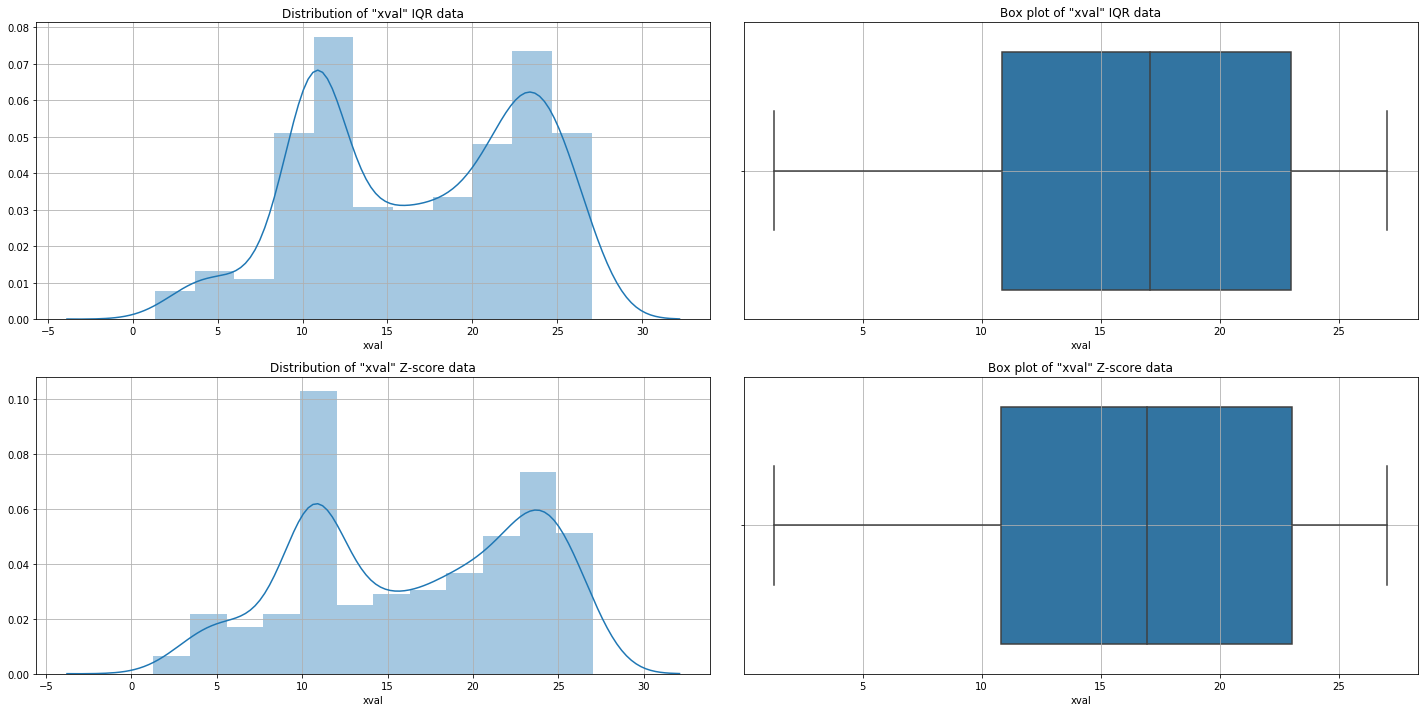

In [102]:
fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(2, 2, 1); plt.tight_layout();
sns.distplot(train_df_iqr['xval']).set_title('Distribution of "xval" IQR data')
plt.grid()
plt.subplot(2, 2, 2); plt.tight_layout();
sns.boxplot(x=train_df_iqr['xval']).set_title('Box plot of "xval" IQR data')
plt.grid()
plt.subplot(2, 2, 3); plt.tight_layout();
sns.distplot(train_df['xval']).set_title('Distribution of "xval" Z-score data')
plt.grid()
plt.subplot(2, 2, 4); plt.tight_layout();
sns.boxplot(x=train_df['xval']).set_title('Box plot of "xval" Z-score data')
plt.grid()
plt.savefig(x_values + 'data_distribution_xval_iqr_z.png', dpi=300, bbox_inches='tight')

#### ydiff

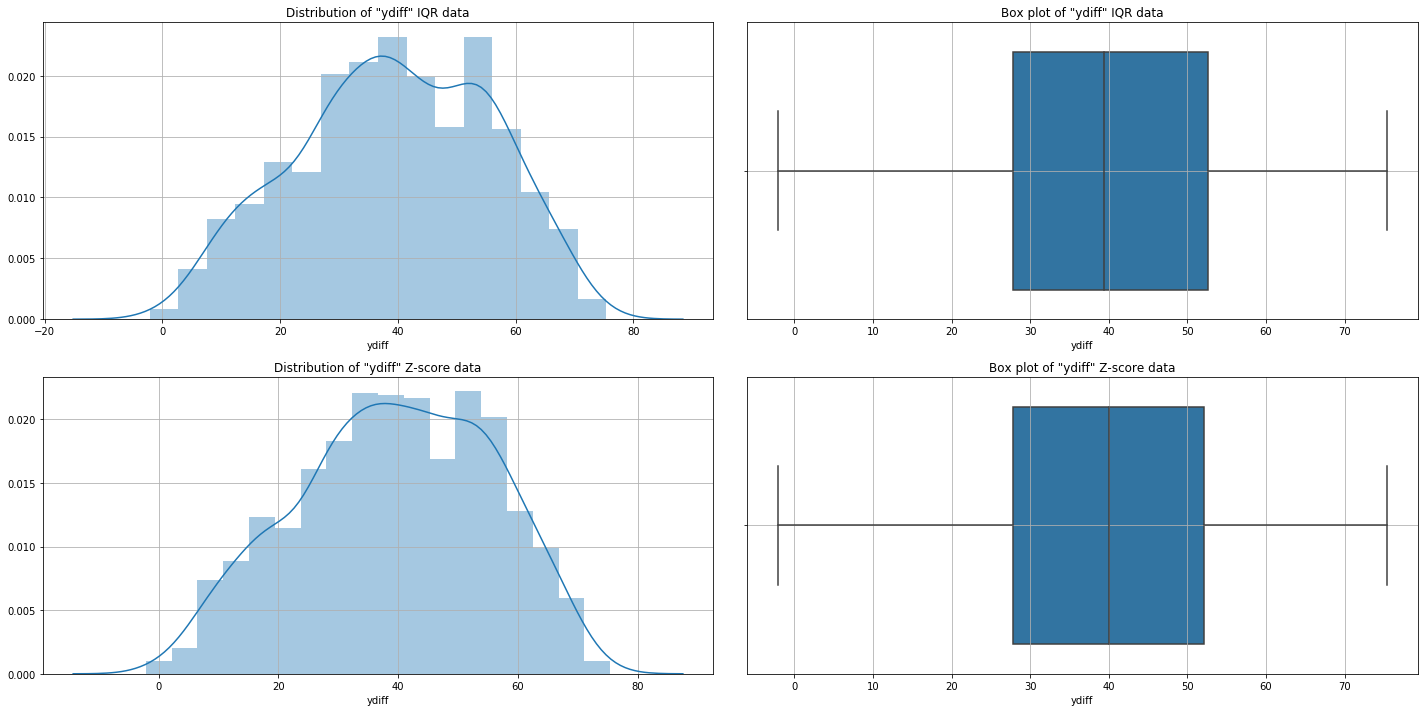

In [103]:
fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(2, 2, 1); plt.tight_layout();
sns.distplot(train_df_iqr['ydiff']).set_title('Distribution of "ydiff" IQR data')
plt.grid()
plt.subplot(2, 2, 2); plt.tight_layout();
sns.boxplot(x=train_df_iqr['ydiff']).set_title('Box plot of "ydiff" IQR data')
plt.grid()
plt.subplot(2, 2, 3); plt.tight_layout();
sns.distplot(train_df['ydiff']).set_title('Distribution of "ydiff" Z-score data')
plt.grid()
plt.subplot(2, 2, 4); plt.tight_layout();
sns.boxplot(x=train_df['ydiff']).set_title('Box plot of "ydiff" Z-score data')
plt.grid()
plt.savefig(y_values + 'data_distribution_ydiff_iqr_z.png', dpi=300, bbox_inches='tight')

#### area_diff

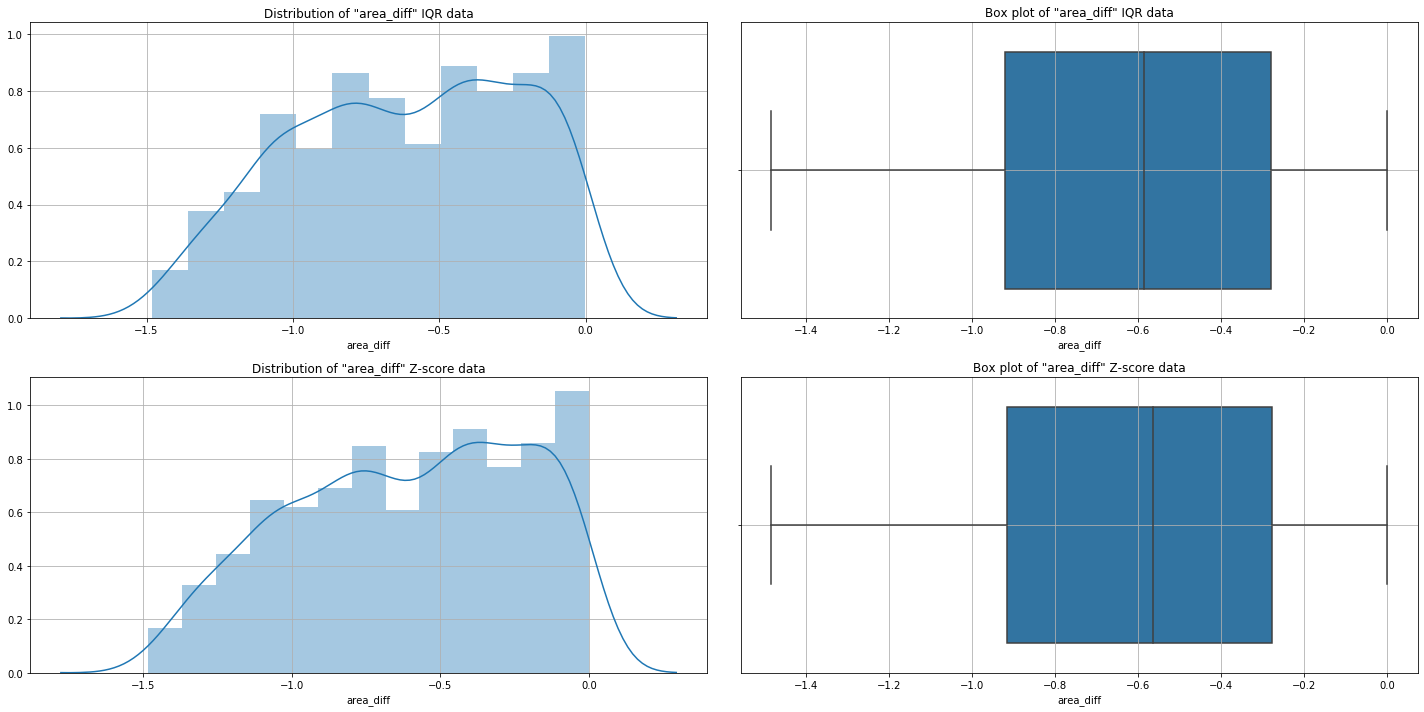

In [104]:
fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(2, 2, 1); plt.tight_layout();
sns.distplot(train_df_iqr['area_diff']).set_title('Distribution of "area_diff" IQR data')
plt.grid()
plt.subplot(2, 2, 2); plt.tight_layout();
sns.boxplot(x=train_df_iqr['area_diff']).set_title('Box plot of "area_diff" IQR data')
plt.grid()
plt.subplot(2, 2, 3); plt.tight_layout();
sns.distplot(train_df['area_diff']).set_title('Distribution of "area_diff" Z-score data')
plt.grid()
plt.subplot(2, 2, 4); plt.tight_layout();
sns.boxplot(x=train_df['area_diff']).set_title('Box plot of "area_diff" Z-score data')
plt.grid()
plt.savefig(area + 'data_distribution_area_diff_iqr_z.png', dpi=300, bbox_inches='tight')

#### max_luminosity

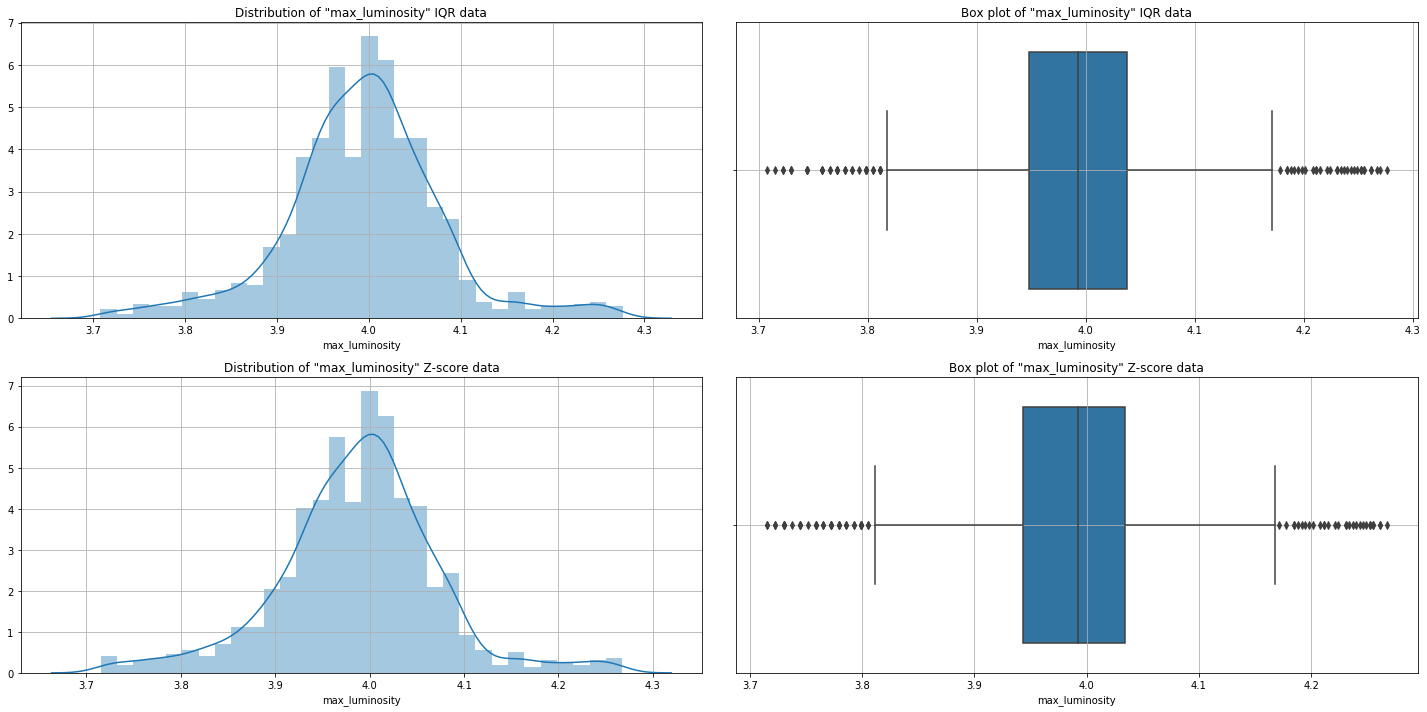

In [97]:
fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(2, 2, 1); plt.tight_layout();
sns.distplot(train_df_iqr['max_luminosity']).set_title('Distribution of "max_luminosity" IQR data')
plt.grid()
plt.subplot(2, 2, 2); plt.tight_layout();
sns.boxplot(x=train_df_iqr['max_luminosity']).set_title('Box plot of "max_luminosity" IQR data')
plt.grid()
plt.subplot(2, 2, 3); plt.tight_layout();
sns.distplot(train_df['max_luminosity']).set_title('Distribution of "max_luminosity" Z-score data')
plt.grid()
plt.subplot(2, 2, 4); plt.tight_layout();
sns.boxplot(x=train_df['max_luminosity']).set_title('Box plot of "max_luminosity" Z-score data')
plt.grid()
plt.savefig(luminosity + 'data_distribution_max_luminosity_iqr_z.png', dpi=300, bbox_inches='tight')

#### thickness

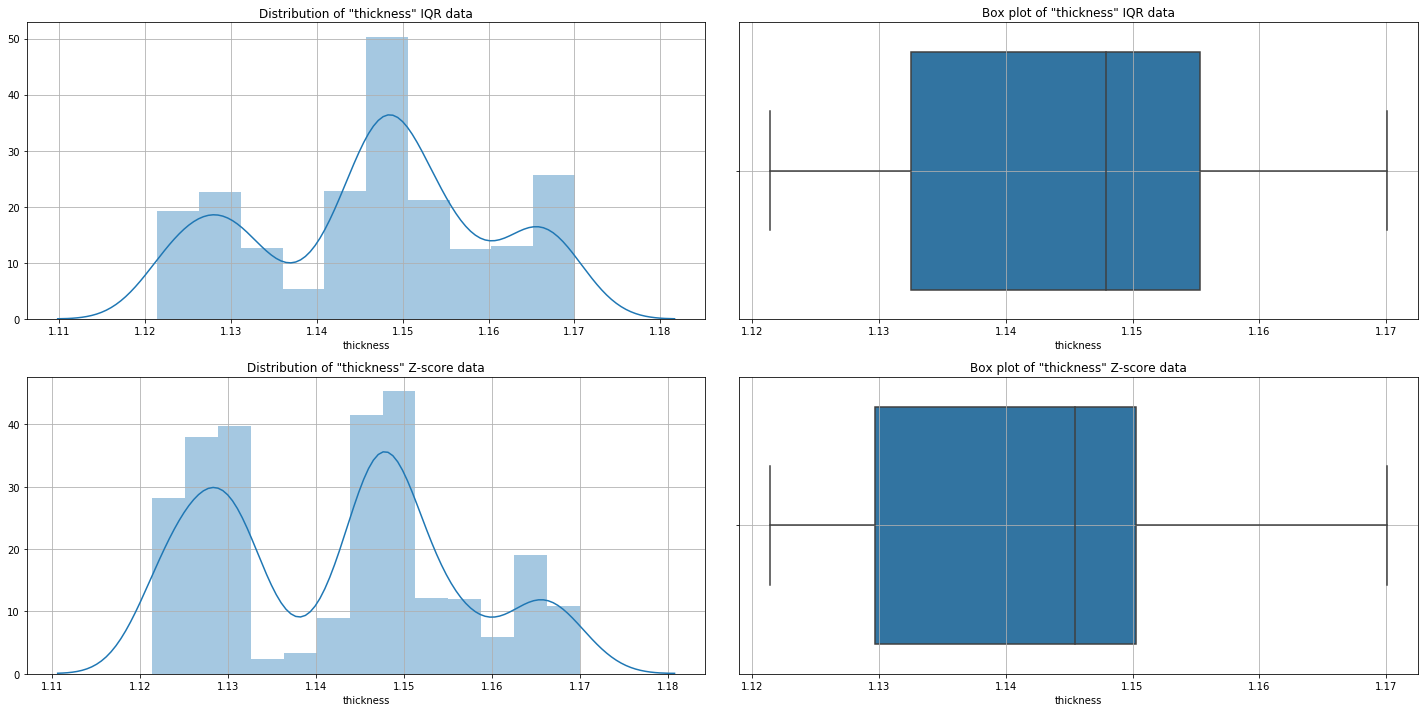

In [39]:
fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(2, 2, 1); plt.tight_layout();
sns.distplot(train_df_iqr['thickness']).set_title('Distribution of "thickness" IQR data')
plt.grid()
plt.subplot(2, 2, 2); plt.tight_layout();
sns.boxplot(x=train_df_iqr['thickness']).set_title('Box plot of "thickness" IQR data')
plt.grid()
plt.subplot(2, 2, 3); plt.tight_layout();
sns.distplot(train_df['thickness']).set_title('Distribution of "thickness" Z-score data')
plt.grid()
plt.subplot(2, 2, 4); plt.tight_layout();
sns.boxplot(x=train_df['thickness']).set_title('Box plot of "thickness" Z-score data')
plt.grid()
plt.savefig(thickness + 'data_distribution_thickness_iqr_z.png', dpi=300, bbox_inches='tight')

## Examine correlation after box-cox and outlier removal

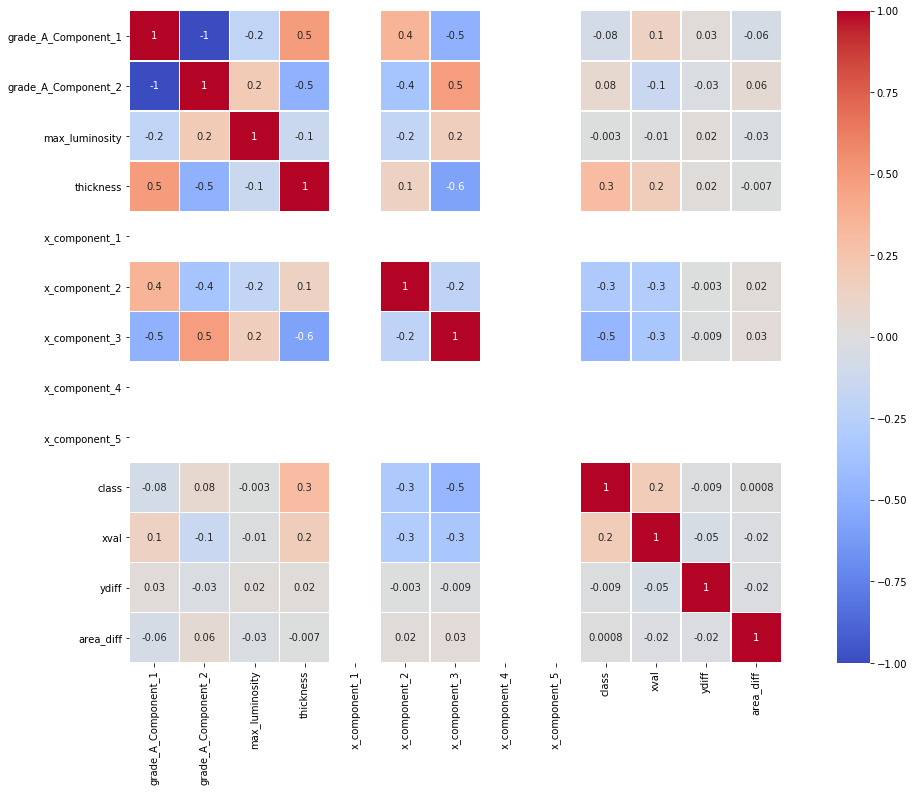

In [43]:
plt.figure(figsize=(20,12))
ax = sns.heatmap(train_df.corr(), annot=True, linewidth = 0.5, cmap='coolwarm', 
                 fmt='.1g', vmin=-1, vmax=1, center= 0, square=True)
plt.savefig(corr_heatmap + 'heatmap_boxcox_data.png', dpi=300, bbox_inches='tight')

## Examine class imbalance

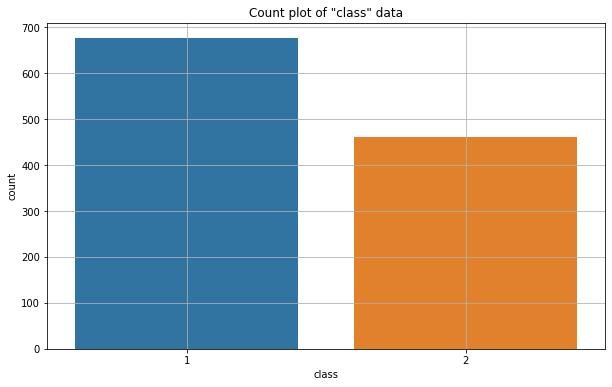

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x="class", data=train_df).set_title('Count plot of "class" data')
plt.grid()

In [42]:
train_df['class_enc'] = train_df['class'].apply(lambda x: 0 if x == 1 else 1)
neg, pos = np.bincount(train_df['class_enc'])
total = neg + pos
print('Total: {}\n  Positive: {} ({:.2f}% of total)\n  Negative: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total, neg, 100 * neg / total))

Total: 1138
  Positive: 462 (40.60% of total)
  Negative: 676 (59.40% of total)

